In [ ]:
2012 년도 AlexNet 은 ReNet-5 와 큰 차이가 없었음. 2013년도의 ZFNet 도 큰 차이 없었음.
시작은 2014년부터! googLeNet, VGGNet
그 전에 NIN 이라는 새로운 아키텍쳐가 소개됐고 그게 뒤에 엄청나게 인용됨. 현대 NN의 표본처럼 사용됨.
NIN 의 3가지 기법
1. 1x1 컨볼루션 쓰는 것. 1) FC 처럼 사용 2) 차원 축소 조절 가능(googLeNet) 3) non-linearity 추가 가능(VGG)
2. stacking. 기본적인 모듈이나 블락을 만들어놓고 쌓아서 구조 만들어 낸 것. 모두 stacking
3. GAP. global average pooling. 파라미터가 많으면 오버피팅 되는데 이에 대한 해결법.

이후 ResNet 와서 2015년에 인간을 뛰어넘음.
이후에 사람들이 각성을 함. 비밀들이 밝혀지기 시작함. Layer 가 많이 쌓으면 쌓을수록 성능 좋은가? 는 맞았음. ResNet 에서 더 많으니까 학습 안되는
것을 발견함. 그것 때문에 batch normalization 테크닉을 씀.

In [ ]:
Rethinking 을 보자.

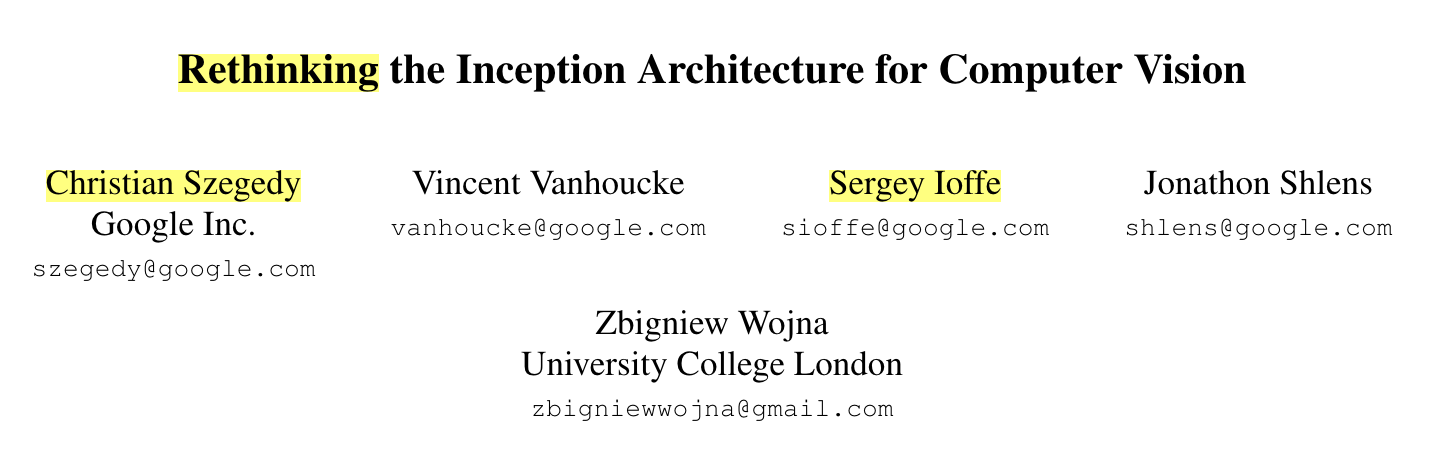

In [ ]:
christian szegedy 가 인셉션 1 만든 사람.
노란 체크된 두 사람이 함께 batch normalization 을 만들어냄.

In [ ]:
abstract

이 논문이 2015년에 나왔는데, 그 당시 VGG가 2등했음. VGG 가 너무 우아해서 이 논문의 저자가 충격받음. 
2014는 googLeNet 과 VGG 가 8개를 벗어나서 20개 레이어를 함. ResNet 에서 밝혀내길 20개를 넘어가면 학습이 잘 안됨.

In [ ]:
2013년도에 FCN(fully connected network)가 튀어나옴.
2014년도에는 GAN 도 튀어나오는 아주 상징적인 해임. convolution 은 2014년도에 main stream 이 됨.

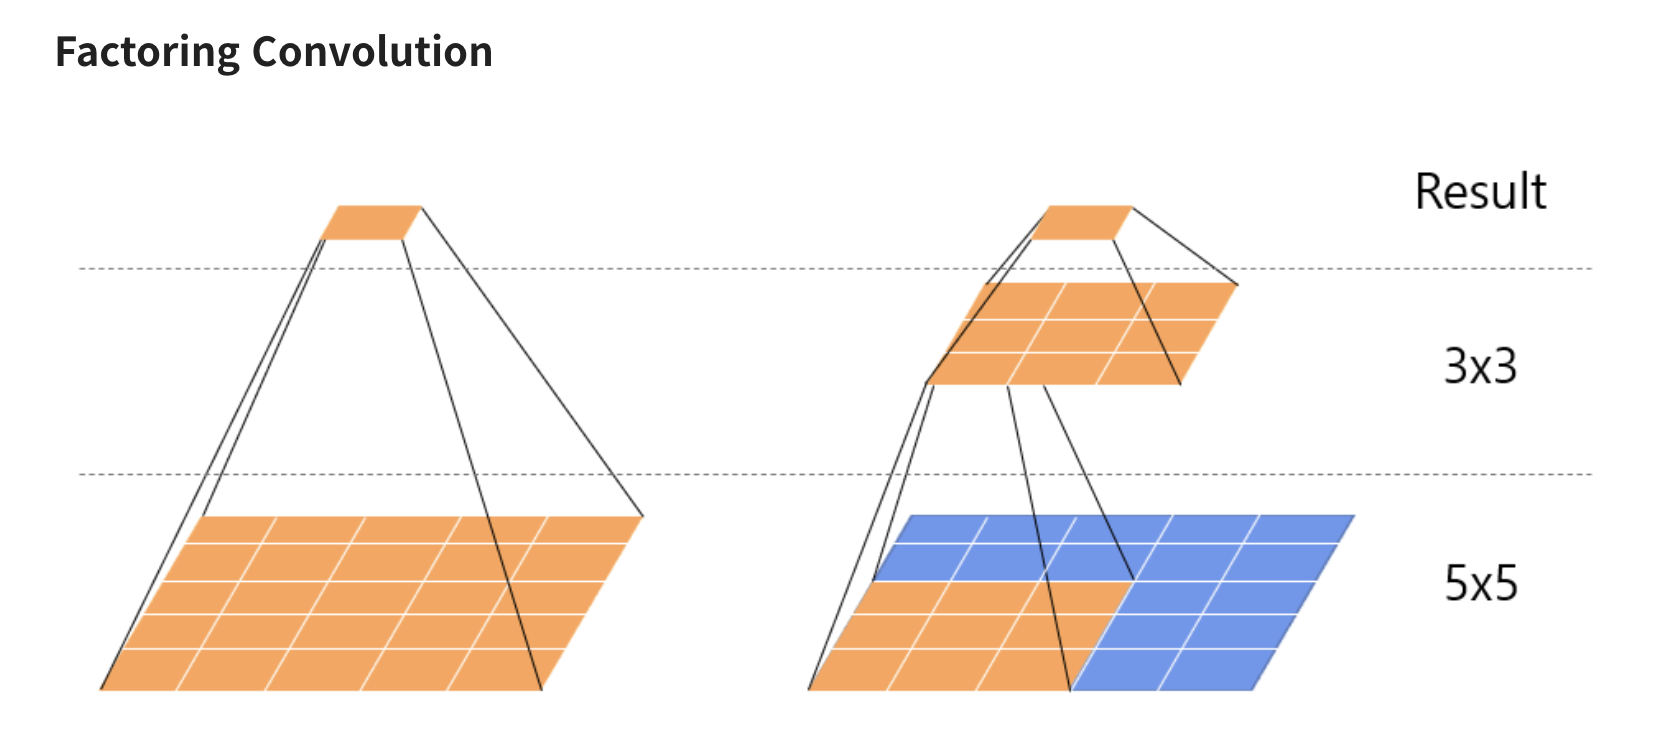

In [ ]:
Factorization into smaller convolutions 에서 VGG 를 잘 설명함

In [ ]:
Spatial Factorization into Asymmetric Convolutions 에서
3x3 을 3x1, 1x3 Conv 로 만들어 놓음. -> 이게 훨씬 더 연산량이 줄어듦. -> numpy broadcasting

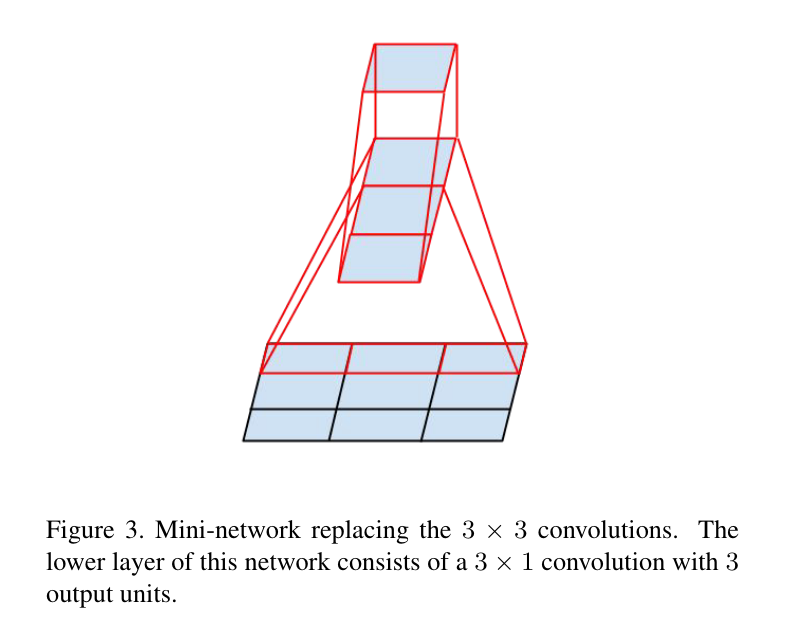

In [1]:
import numpy as np
x,y = np.ogrid[1:3, 4:6]

In [2]:
x

array([[1],
       [2]])

In [3]:
y

array([[4, 5]])

In [4]:
x + y

array([[5, 6],
       [6, 7]])

In [ ]:
인셉션과 ResNet 의 차이
ResNet 은 자기 자신의 값을 더함. F(x) + x => 구조를 더하는 것이 아니라 값을 더함
인셉션은 구조를 더함.
값을 더하기 위해서는 완전히 동일한 구조체여야 함. 그래야 완전히 vectorize 연산이 됨.

In [ ]:
그래서 rethinking 해서 기존의 인셉션의 구조를 바꿈.

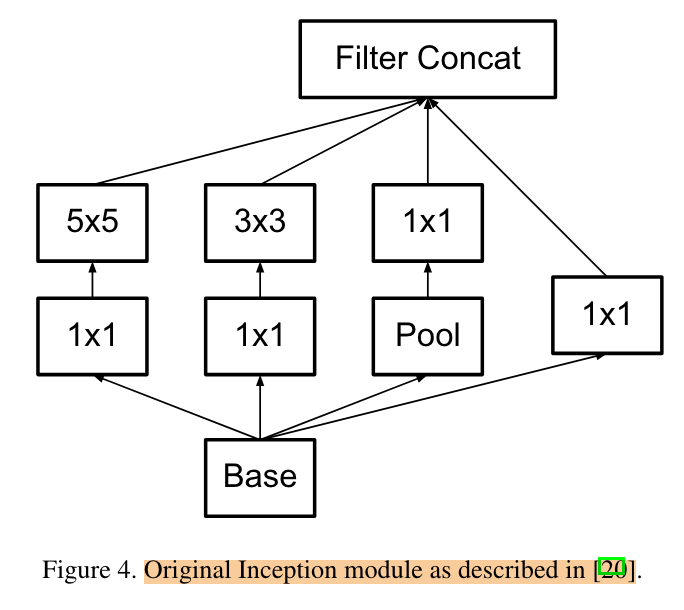
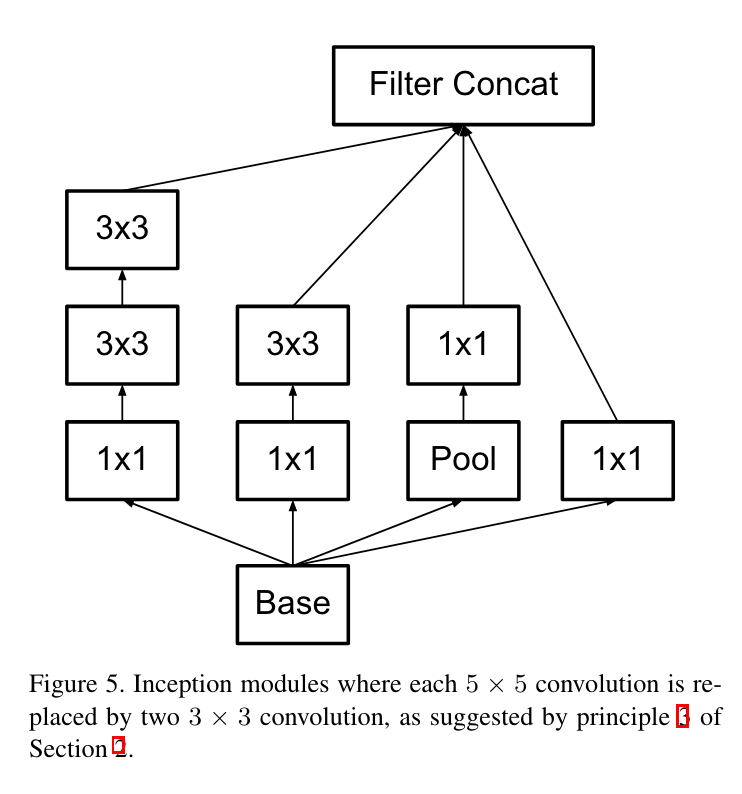

In [ ]:
기존 인셉션 보면 Auxiliary Classifiers 가 있었음. 학습이 잘 안되는 것을 보조해주기 위해서.
기존 인셉션에서는 학습할 때만 이것들을 쓰고 실제 가동할 땐 지우고 함.
YOLO 도 Inception 기반으로 만듦. 역전파가 잘 안되서 이것을 가져다 붙히는 것.

In [ ]:
주위에 있는 VGG 와 ResNet 봤더니 잘되는데, 기존 인셉션은 잘 안되더라! 그래서 기존 인셉션에 붙혀서 해봤더니 학습에 지장을 주지 않았다고 논문에서
주장. 여기서 알 수 있는 것은 SOTA 라는 것은 공인된 것이 아니라는 것. 그래서 이후 학습 보조 도구들은 안나옴.

In [1]:
import tensorflow as tf

In [3]:
tf.__version__

'2.12.0'

In [5]:
inc = tf.keras.applications.inception_v3

In [9]:
# Netron 에서 보는 방법
inc.save('inception.h5')

AttributeError: module 'keras.api._v2.keras.applications.inception_v3' has no attribute 'save'

In [9]:
tf.keras.utils.plot_model(inc)

AttributeError: module 'keras.api._v2.keras.applications.inception_v3' has no attribute 'built'

In [ ]:
여기서 멀티 인풋, 멀티 아웃풋이 기본 모양이 됨.

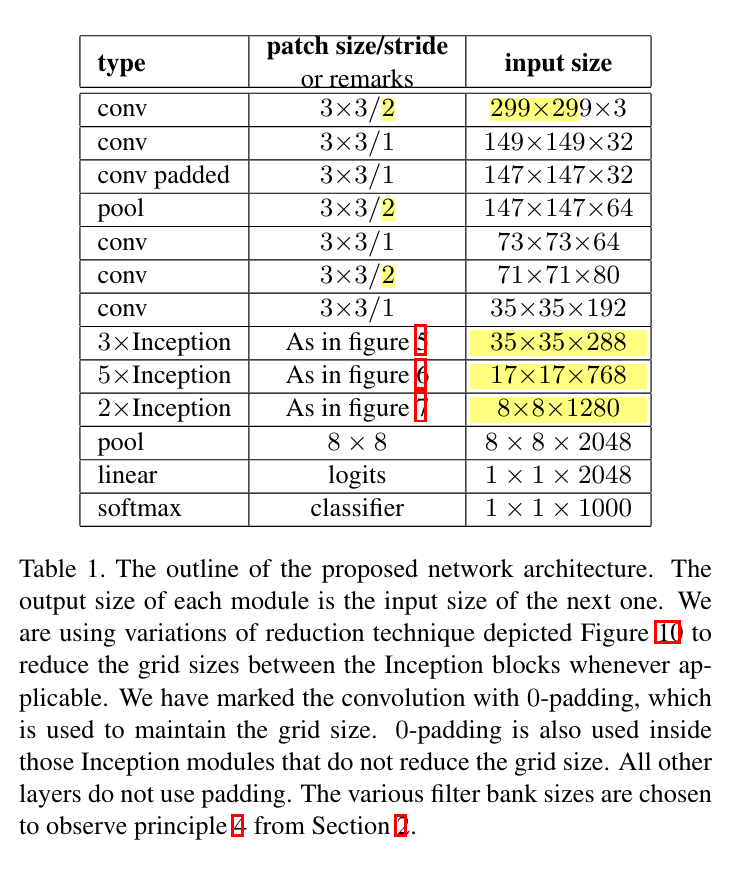

In [ ]:
stride 2 인 이유는 pooling 안 쓰기 위해서

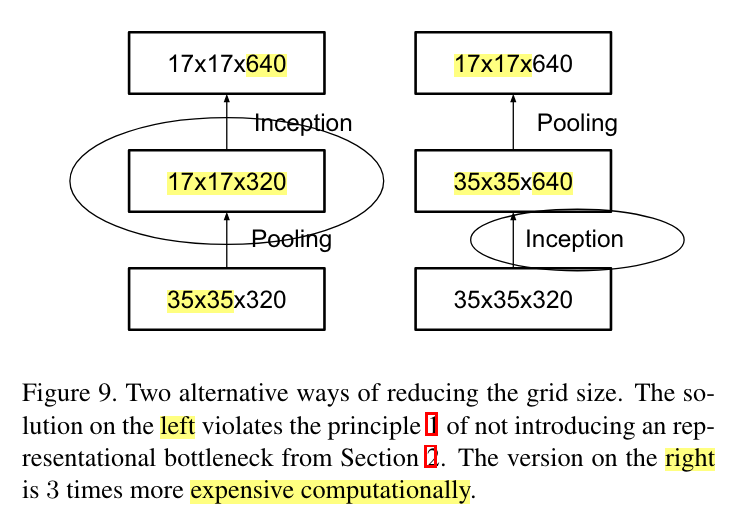

In [ ]:
줄이고 나서 인셉션. 인셉션을 하고 줄일 떄. 이 2개가 다름.
ResNet 과 원래 인셉션은 이 두개가 같다고 봄. 그런데 달랐던 것!
왼쪽은 bottleneck 이 생겨서 성능이 조금 떨어짐.
오른쪽은 연산량이 많아짐.

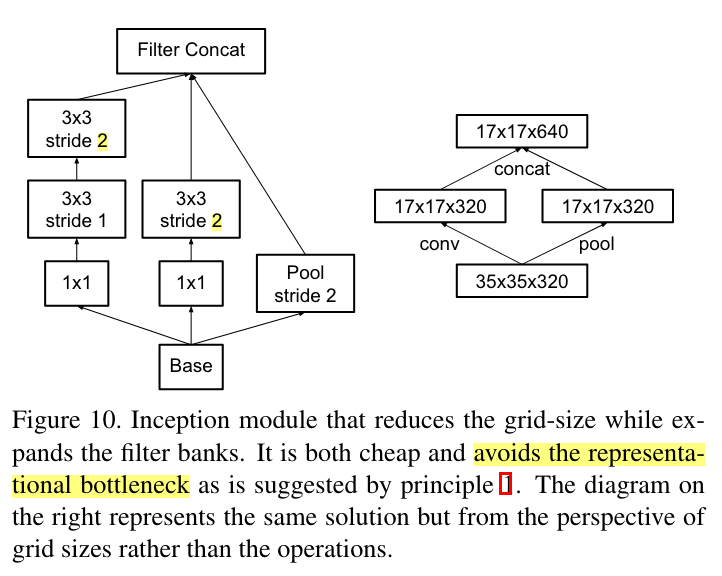

In [ ]:
이렇게 하면 좋은 구조일 것이다! representation bottleneck 을 살짝 줄이고 연산량도 줄일 수 있다!

In [ ]:
라벨 스무딩은 오버피팅 이야기할 때 또 할 것.

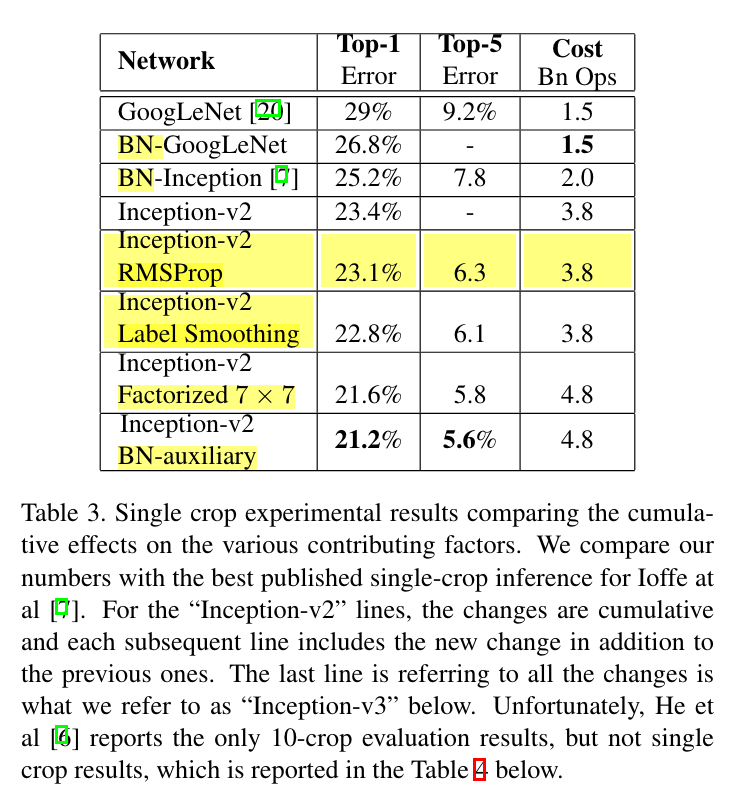

In [ ]:
위 순서를 잘 볼 것.
구글넷 -> batch normalization 구글넷(전체) -> 인셉션 모듈 안에 BN -> 인셉션 v2 -> RMSProp(optimization)
-> Label Smoothing(Fast-RCNN, 라벨을 0/1 이 아니라 .3/.7 으로 줄이는 것) -> 인셉션 v2 7x7 -> 인셉션 auxiliary에 BN 적용
인셉션 v2의 구조 + 이런 다양한 기법을 붙힌 것이 바로 인셉션 v3

In [ ]:
ResNet, Inception 구조 복잡도 자체가 다름.
VGG 또는 ResNet 은 구조가 매우 단순함.

In [ ]:
2017년도 이후에 결국 ResNet 의 승리로 종결됨. 이 논문의 저자들이 ResNet 에 있는 것을 활용함.
이후에 케라스 만든 사람이 만든 Xception 이 대박임.

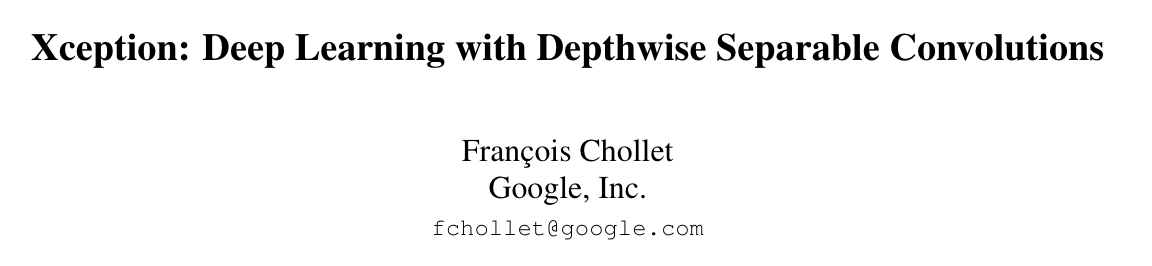

In [ ]:
이런 식으로 인셉션이 발전하고 v4 에서 종말함. 2015년도는 ResNet 과 인셉션 v2,v3가 중요

In [ ]:
2016년 대회 1등은 ResNet, Inception v3 하고 앙상블을 함.
이 때도 1등 팀보다 2등한 팀이 좀 더 관심을 가짐.

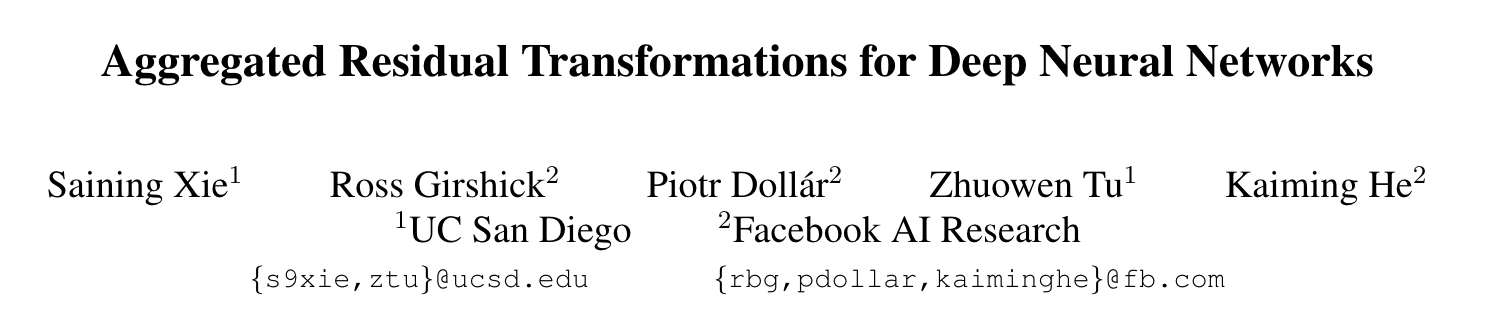

In [ ]:
이 논문이 바로 ResNeXt.
Kaiming He 가 쓰는 논문은 항상 맨 처음에 그림이 나옴.

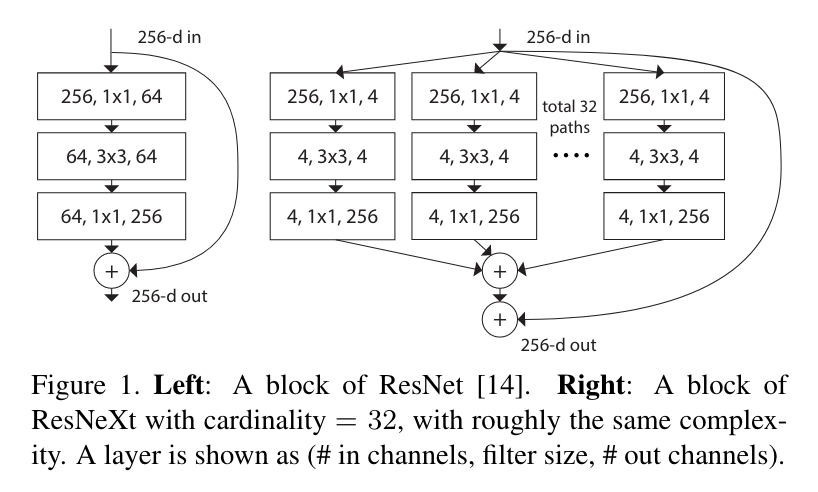

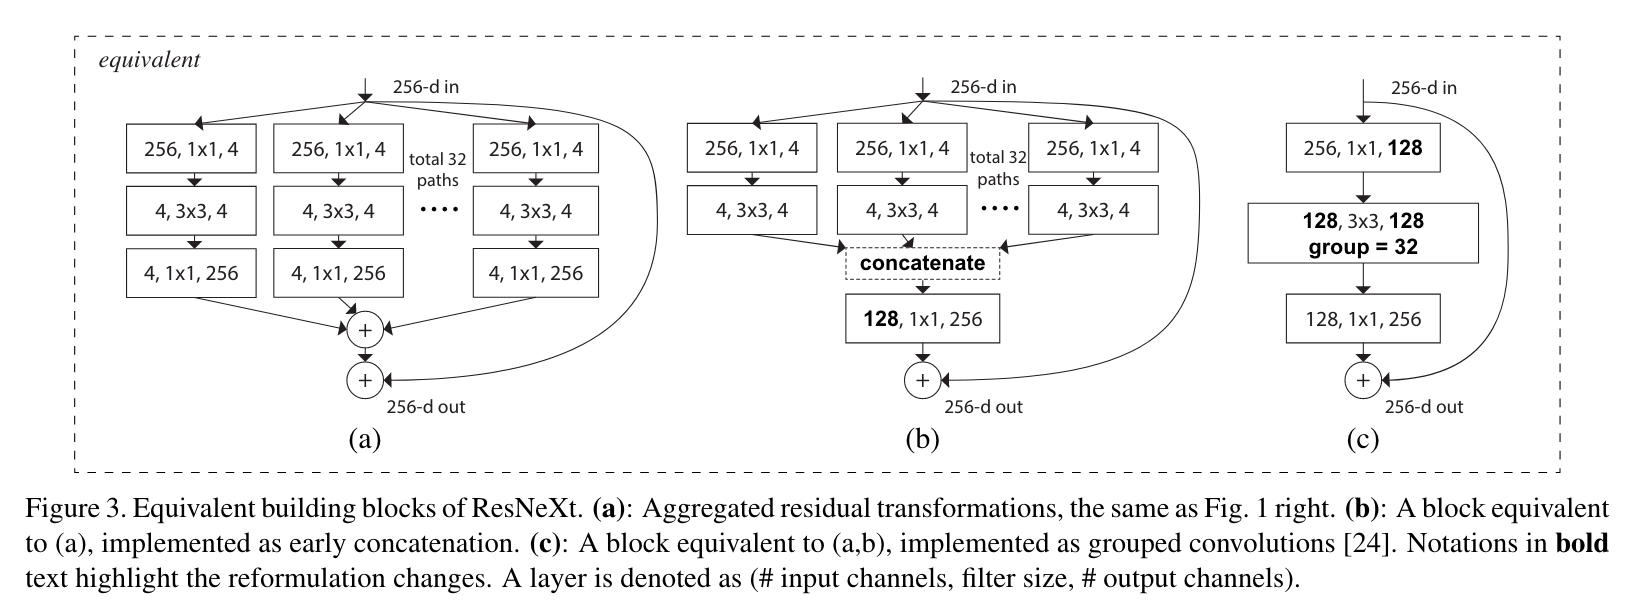

In [ ]:
위 3구조는 동등한 구조임. ResNeXt 에서 제안하는 이 형태는, 결국 하나의 구조를 그룹화 해서 쪼개버리면 연산량이 줄어들 수 있다는 것! 그런데 값은
똑같음. 그러면, 2015년도 후반부터 나타났던 ResNet 이 레이어 156개, 인셉션 v2, v3 엄청 복잡해서 factorize 기법 엄청 썼었는데,
그 3x3 기법을 계속 쓰되, 그룹으로 쪼개서 쓰자! Group Conv 을 써서 성능은 유지된 채 연산량이 줄어드는 것을 발견해 냄.

In [ ]:
이제 연산량을 줄이는 테크닉을 한 개 더 안 것. Group Conv. => 이것은 AlexNet 에서 나왔지만, 그 때는 어쩔 수 없이 GPU 문제 때문에 나온 것.
여기서는 너무 크니까 줄이자!